In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline
data = pd.read_csv("data/train.csv")

# Context
Тема для иследования - какая взаимосвязь между признаками пассажира и его выживаемостью. 
     
   1.Оценим взаимосвязь между каждой категориальными переменными и выживаемостью
        Pclass - уровень класса \ ПЕрвыми садили в спасательные шлюпки пассажиров 1 класса
        Sex - пол \ Был ли приоритет у женщин
        SibSp  - братья \сестры 
        Parch - родители дети \ Шансы на выживание увеличиваются если вы семьей или один?
        Age - возраст\ Выживали в основном молодые?
        
     Оценить взаимодействие между переменными
     Corelation between Fare & Pclass
     Corelation between Age & Pclass
     Corelation between Sex & Pclass
     
Вывод
Даты спора
    Оцените качество данных
    Данные профиля
    Исследуйте каждую отдельную переменную в наборе данных
    Оцените взаимосвязь между каждой переменной и целью
    Оценить взаимодействие между переменными
    Исследуйте данные во многих измерениях

# Data quality assessment

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


categorical columns - Pclass, Sex, SibSp, Parch, Embarked
numerical columns: Age, Fare
пропуски в данных  - Embarked, Age, Fare, Cabin 
колонки не несущие значения (текст) - Name

In [4]:
# проверим уникальность значений удалив колонку идентификатор
data.drop('PassengerId', axis=1, inplace=True)
data.duplicated().value_counts()

False    100000
dtype: int64

Видим что значения не дублируються и уникальные

In [5]:
data['Name'].value_counts()

Johnson, John         31
Smith, John           24
Smith, James          24
Johnson, William      22
Smith, Michael        20
                      ..
Bailey, Veronica       1
Dillion, Maureen       1
Miller, Jesse          1
Brinkmann, Marilyn     1
Bates, Judith          1
Name: Name, Length: 92144, dtype: int64

Уберем колонку пустую более чем на половину Cabin   и колонку не несущую значения (текст) - Name,  Ticket

In [6]:
delete_columns = ['Name', 'Cabin', 'Ticket']
data.drop(delete_columns, axis=1, inplace=True)

In [7]:
# Embarked as mode(категорию заполним наиболее чаще встречающимся значением)
data['Embarked'].fillna('S', inplace=True)
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.0,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.0,3.00
Sex,100000.0,0.438860,0.496250,0.00,0.00,0.00,1.0,1.00
Age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.0,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.0,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.0,9.00
Fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.5,744.66
Embarked,100000.0,0.330350,0.574197,0.00,0.00,0.00,1.0,2.00


Коэффициент выживаемости среди разных категориальных признаков в столбце

In [9]:
df=data['Survived'].value_counts()/data.shape[0]
df

0    0.57226
1    0.42774
Name: Survived, dtype: float64

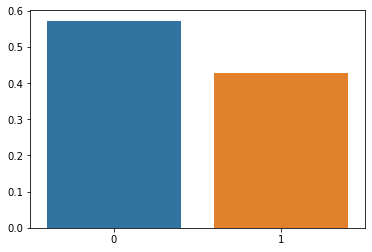

In [10]:
sns.barplot(x = list(df.index), y = df.values);

In [11]:
# Погибло 57%, выжило 42%

In [12]:
#Pclass - уровень класса

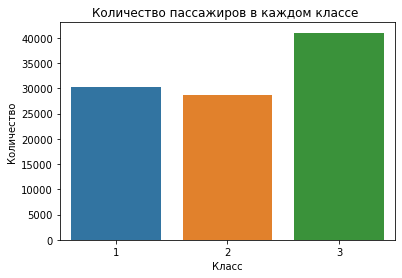

In [13]:
# Количество пассажиров в каждом классе 
plt.title("Количество пассажиров в каждом классе ")
sns.countplot(x='Pclass',data=data);
plt.xlabel("Класс");
plt.ylabel("Количество");

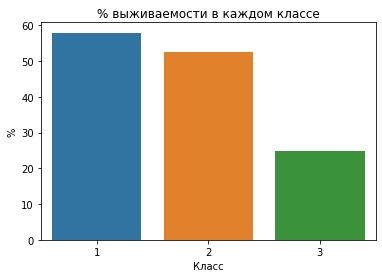

In [14]:
plt.title("% выживаемости в каждом классе")
df = data.groupby('Pclass')['Survived'].apply(lambda x: x.sum()/len(x)*100);
sns.barplot(x = list(df.index), y = df.values);
plt.xlabel("Класс");
plt.ylabel("%");

In [15]:
df

Pclass
1    57.977899
2    52.501831
3    24.730527
Name: Survived, dtype: float64

Вывод 1 - количество пассажиров больше всех в 3 классе и самая маленькая выживаемость, самый высокий процент выживаемости в 1 классе. Признак класс имеет большое влияние на выживаемость

In [16]:
#Sex- пол

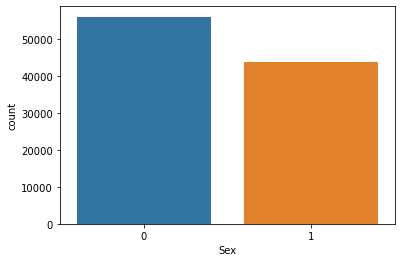

In [17]:
sns.countplot(x='Sex', data=data);

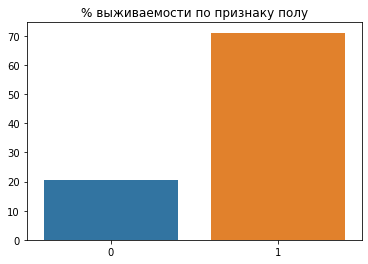

In [18]:
df = data.groupby('Sex')['Survived'].apply(lambda x: x.sum()/len(x)*100)
plt.title("% выживаемости по признаку полу")
sns.barplot(x = list(df.index), y = df.values);


In [19]:
df

Sex
0    20.579535
1    71.152532
Name: Survived, dtype: float64

Вывод 2 - при небольшой разнице в количестве мужчин и женщин, выживаемость женщин более 71%. Признак пол имеет большое влияние на выживаемость

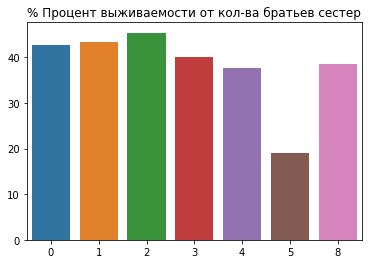

In [20]:
df = data.groupby('SibSp')['Survived'].apply(lambda x: x.sum()/len(x)*100)
plt.title('% Процент выживаемости от кол-ва братьев сестер')

sns.barplot(x = list(df.index), y = df.values);


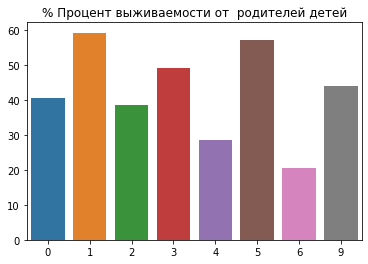

In [21]:
df = data.groupby('Parch')['Survived'].apply(lambda x: x.sum()/len(x)*100)
plt.title('% Процент выживаемости от  родителей детей')

sns.barplot(x = list(df.index), y = df.values);

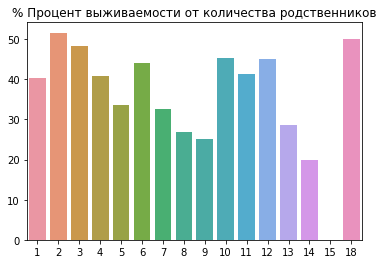

In [22]:
# соверем родственников вместе
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
plt.title('% Процент выживаемости от количества родственников')
df = data.groupby('FamilySize')['Survived'].apply(lambda x: x.sum()/len(x)*100)
sns.barplot(x = list(df.index), y = df.values);

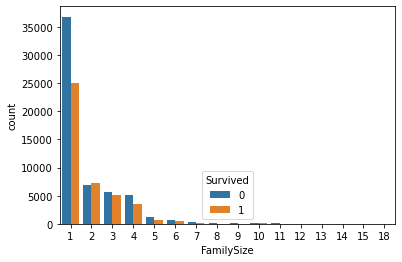

In [23]:
sns.countplot(x='FamilySize', hue = 'Survived', data=data);

Вывод 3 - больше 60 процентов пассажиров ехали в одиничку. Одиночество не повышало шанс выжить.  Начиная с 2-3 членов семьи, хотя выживаемость высокая

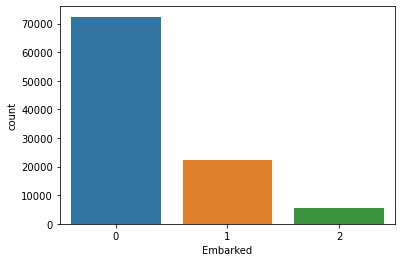

In [24]:
sns.countplot(x='Embarked', data=data);
# самое большое количестов выживших в 1 классе, а погибших в 3. Класс влияет на выживаемость

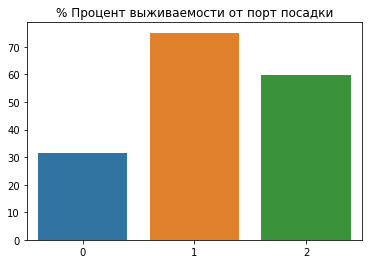

In [25]:
df = data.groupby('Embarked')['Survived'].apply(lambda x: x.sum()/len(x)*100)
plt.title('% Процент выживаемости от порт посадки')

sns.barplot(x = list(df.index), y = df.values);

Вывод 4 - процент выживаемости больше в 'C'и'Q'  портах, но там зашло меньшее количество человек. Возможно есть корреляция между портом и классом или портом и полом?

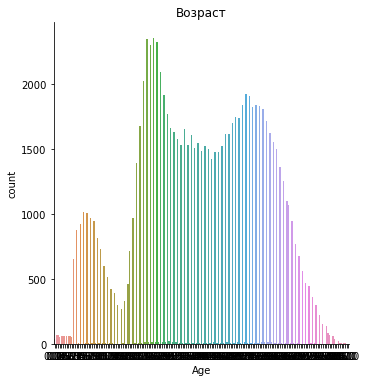

In [26]:
sns.catplot(x="Age",data=data, kind="count", aspect=1);
plt.title('Возраст')
plt.show()

In [27]:
data['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

In [28]:
data['Age'].corr(data['Survived'])

0.10389464560615701

<AxesSubplot:xlabel='Survived', ylabel='Age'>

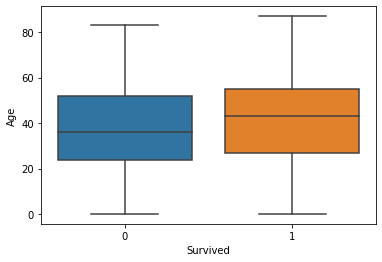

In [29]:
sns.boxplot(data=data, x = 'Survived', y='Age')

In [30]:
# Корреляция составляет 0,10, что является низким показателем.
# выжили люди , которые старше. 

In [31]:
# заполним пропуски - если заполним медианным значеним 
data['Age_fill'] = data['Age']
data['Age_fill'].fillna(data['Age_fill'].median(), inplace=True)

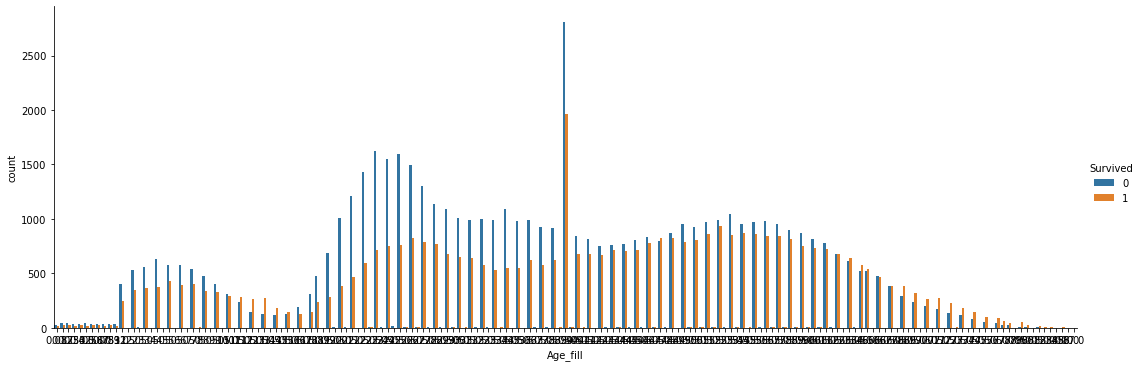

In [32]:
sns.catplot(x="Age_fill", hue="Survived",data=data, kind="count", aspect=3);

In [33]:
data.drop("Age_fill", axis=1, inplace=True)

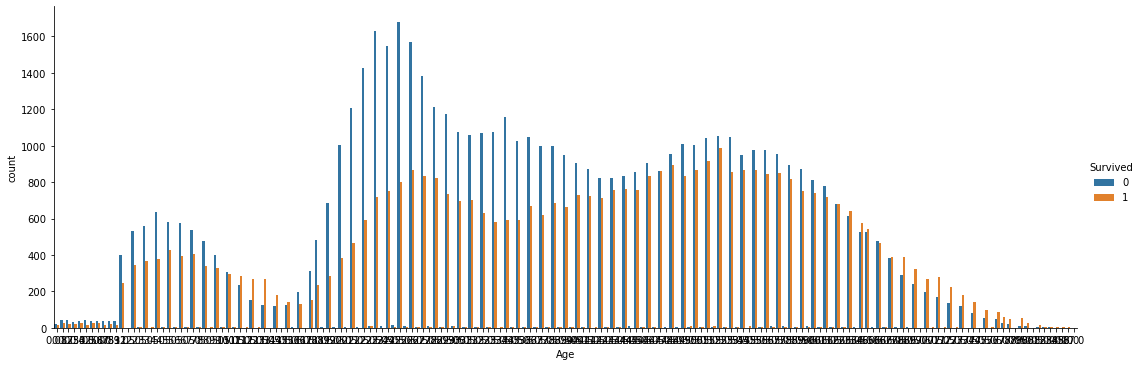

In [34]:
# заполним рандомными значением в квартиль
liste_sample =np.random.randint(25,53, size=data['Age'].isnull().sum())
data['Age'] = data.apply(lambda row : random.choice(liste_sample) if  np.isnan(row['Age']) else row['Age'],axis=1)
sns.catplot(x="Age", hue="Survived",data=data, kind="count", aspect=3);

In [35]:
# Fare - цена билета

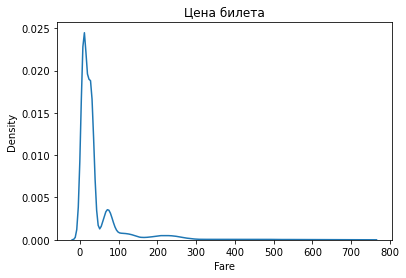

In [36]:
sns.kdeplot(data=data, x="Fare");
plt.title('Цена билета')
plt.show()

In [37]:
data['Fare'].describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

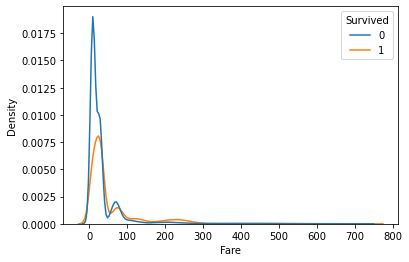

In [38]:
sns.kdeplot(data=data, x="Fare", hue="Survived");

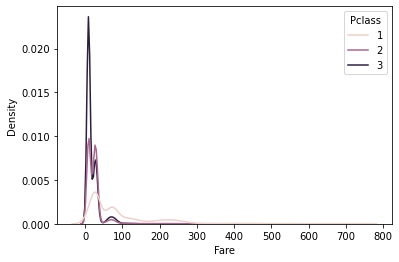

In [39]:
sns.kdeplot(data=data, x="Fare", hue="Pclass");

In [40]:
# Большинство болетов в районе стоимости 24, но есть и очень дорогие билеты. Выжили пассажиры с более дорогими билетами, цена билета зависила от класса.
# Есть выбросы по цене билета - как очень дорогие вне зависимотсти от класса (Возможно ошибки заполнения ?)

In [41]:
# Заполним пропуски в цене средним значением каждого класса 'Fare'
data['Fare'] = data.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

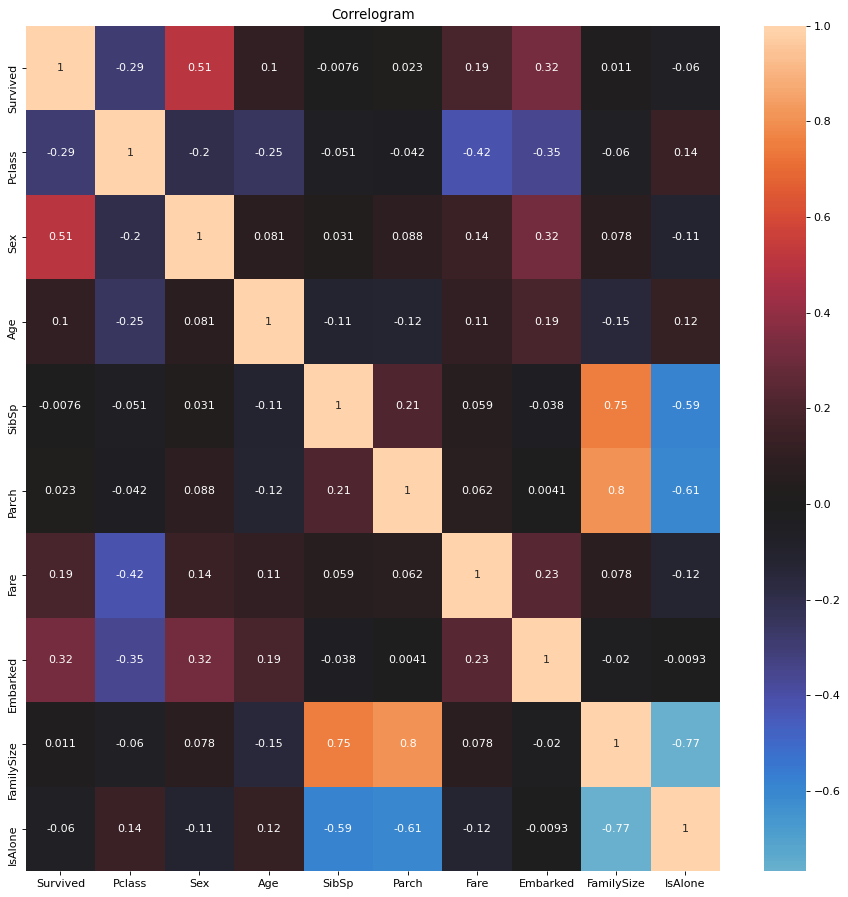

In [42]:
plt.figure(figsize=(14,14), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns,  center=0, annot=True)
plt.title('Correlogram')
plt.show()

Выживаемость прямая корреляция с полом и обратная с классом. А так же с ценой билета и портом, возрастом.
В свою очередь прослеживается взаимосвязь:
1. Возраста класс и пола
2. Порт от пола и класса
3. Стоимости зависит от класса , порта, возраста и пола

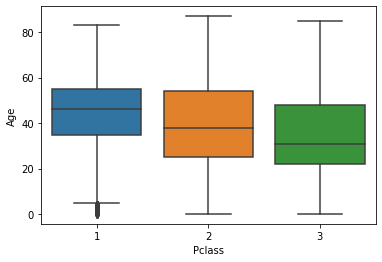

In [43]:
# Корреляцию возраста
sns.boxplot(x='Pclass', y='Age', data=data);
# в первом классе преимущественно люди после 40 , а третьем классе преимущественно молодые люди

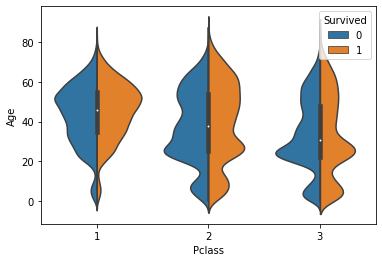

In [44]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=data);
# непонятно возраст в каждом классе не влиял на выживаемость? Добавим еще один важнейший фактор пол

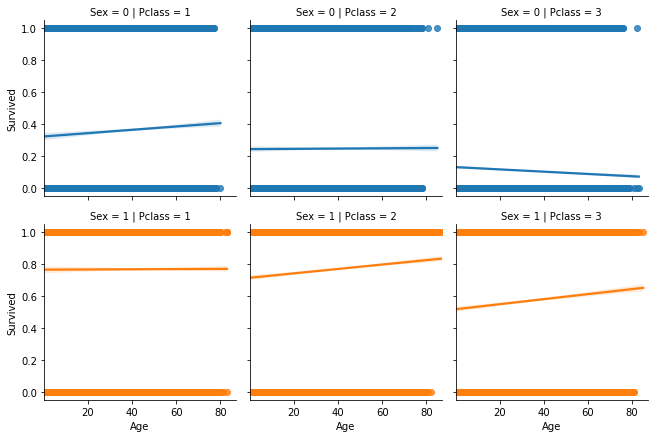

In [45]:
sns.lmplot(x='Age', y='Survived', hue='Sex', row='Sex', col='Pclass',data=data, height=3)

In [46]:
# Если вы женщина с увеличением возраста в 2 и3 классе повышается шанс вижить, 
#если мужчина с увеличением возраста повышается шанс выжить в 1 классе и уменьшается в 3 классе

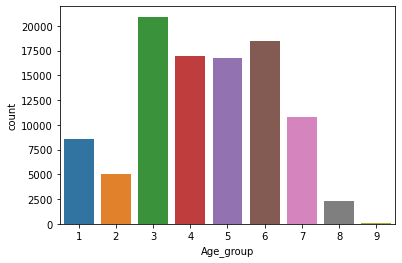

In [47]:
data['Age_group'] = data['Age'].map(lambda age: int(age//10)+1)
sns.countplot(x='Age_group',data=data);

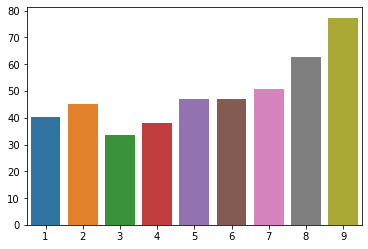

In [48]:
df = data.groupby('Age_group')['Survived'].apply(lambda x: x.sum()/len(x)*100)
sns.barplot(x = list(df.index), y = df.values);

Самый низкий процент выжживших  в возрасте от 20-30, после 30 повышается процент выживаемости с увеличением возраста 

In [ ]:
#2 Стоимость от класса и порта

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

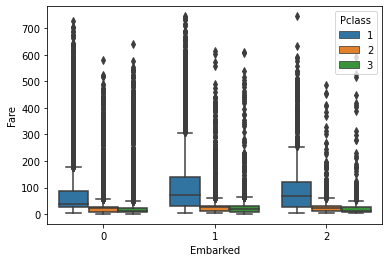

In [50]:
sns.boxplot(data = data, x = 'Embarked', y = 'Fare', hue='Pclass')

In [51]:
#2 Порт от пола и класса

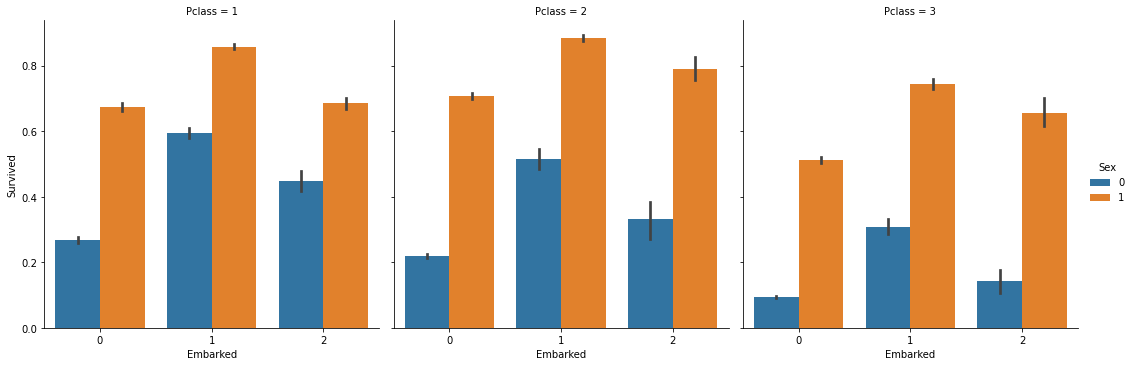

In [52]:
sns.catplot(x='Embarked', y='Survived',col='Pclass', hue='Sex', data=data, kind='bar');
# выживших мужчиин среди 3 класса меньше всего

# Summary

Выводы 
- Погибло 57%, выжило 42%
- выживаемость зависела большей степени от класса и пола
- количество пассажиров больше всех в 3 классе и самая маленькая выживаемость, самый высокий процент выживаемости в 1 классе. Признак класс имеет большое влияние на выживаемость
- при небольшой разнице в количестве мужчин и женщин, выживаемость женщин более 71% (больше чем в 3 раза чем у мужчин). Признак пол имеет большое влияние на выживаемость
 - в первом классе преимущественно люди после 40 , а третьем классе преимущественно молодые люди 
 - Самый низкий процент выжживших  в возрасте от 20-30, после 30 повышается процент выживаемости с увеличением возраста 
- Если вы женщина с увеличением возраста в 2 и3 классе повышается шанс вижить, самые большие шансы у женщин 1 класса вне зависимости от возраста
- если мужчина низкий уровнь выживаемости с увеличением возраста повышается шанс выжить в 1 классе и уменьшается в 3 классе(более возрастные люди могли себе позволить более высокий класс каюты и поэтому повысили шанс на выживание) 
- больше 60 процентов пассажиров ехали в одиничку. Одиночество не повышало шанс выжить.  Для 2-3 членов семьи выживаемость высокая
- большие выбросы в стоимости билетов всех классов, возможно ошибки в заполнении стоимости

